In [1]:
# reading data
import numpy as np
import pandas as pd
data = pd.read_csv('dataset.csv')

In [2]:
#data = df.copy()
#data = data [:15000]
data.head()

,source,review_id,user_name,review_description,rating,review_date,developer_response,developer_response_date,label
0,Google Play,d855686a-7ebe-4cef-911f-3d124bc2d61a,‫عمرو محمد (داود)‬‎,very good,5,2023-01-04 15:47:27,We sincerely thank you for taking the time to ...,2023-01-04 21:06:38,Custom
1,Google Play,0491e3b8-c262-4ef3-ab74-4a962a7a28ee,Moath Tobasi,ارمكس برنامج ممتاز لا يوجد اي تعليق المواعيد ف...,5,2023-01-04 15:46:03,سعيدين بخدمتك وشكرا لتقيمك نتطلع لخدمتك مستقبلا,2023-01-04 15:12:31,Generic
2,Google Play,0b537bf6-2dc3-4d4b-b239-6e6b916eaadc,Mohamed Mohamedy,فوق الممتاز,5,2023-01-04 14:07:14,سعيدين بخدمتك وشكرا لتقيمك نتطلع لخدمتك مستقبلا,2023-01-04 19:51:33,Generic
3,Google Play,5e50884e-e69a-4d05-8ae3-0b0aea7f278c,temoo tamam,خدمة سيئة جدا وعدم الالتزام بمواعيد التسليم وخ...,1,2023-01-04 13:52:23,مرحبا عذرا منك علي ذلك ! نود الحصول علي تفاصي...,2023-01-04 19:30:51,Generic
4,Google Play,c29dbb95-8dfa-4918-94ca-5e124d405930,tufool mab,شكرا على حسن تعاونكم معنا,5,2023-01-04 06:42:33,يسرنا سماع ذلك ونتمني ان نكون عند حسن ظنك دائم...,2023-01-04 15:50:52,Generic


In [3]:
# check missing values
data.isna().sum()

source                     0
review_id                  0
user_name                  0
review_description         0
rating                     0
review_date                0
developer_response         0
developer_response_date    0
label                      0
dtype: int64

In [4]:
# check data shape
data.shape

(283835, 9)

# Text Preprocessing

This is where all text cleaning takes place. It’s a loop that iterates through all 5,572 documents and does the following:

    Remove all special characters
    Lowercase all the words
    Tokenize
    Remove stopwords
    Lemmatize


In [5]:
# text preprocessing
# download nltk
import nltk
#nltk.download('all')

In [6]:
# preprocessing loop
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [7]:
# # create a list text
# text = list(data['developer_response'])

In [8]:
# import gensim
# # Clean/Normalize Arabic Text
# def clean_str(text):
#     search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
#     replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ']
    
#     #remove tashkeel
#     p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
#     text = re.sub(p_tashkeel,"", text)
    
#     #remove longation
#     p_longation = re.compile(r'(.)\1+')
#     subst = r"\1\1"
#     text = re.sub(p_longation, subst, text)
    
#     text = text.replace('وو', 'و')
#     text = text.replace('يي', 'ي')
#     text = text.replace('اا', 'ا')
    
#     for i in range(0, len(search)):
#         text = text.replace(search[i], replace[i])
    
#     #trim    
#     text = text.strip()

#     return text

In [9]:
# corpus = []
# #i = 0
# for i in range(len(text)):    
#     r = text[i]    
#     #r = re.sub('[^a-zA-Z]', ' ', text[i])    
#     #r = r.lower()        
#     r = clean_str(r)    
#     r = r.split()           
#     r = [word for word in r if word not in stopwords.words('arabic')]        
#     r = [lemmatizer.lemmatize(word) for word in r]    
#     r = ' '.join(r)    
#     corpus.append(r)   
    
# #assign corpus to data['developer_response']
# data['developer_response'] = corpus
# #data.head()

### Train-test-split

Let’s split the dataset into train and test before feature extraction.

In [10]:
# Create Feature and Label sets
X = data['developer_response']
y = data['label']

In [11]:
# train test split (66% train - 33% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)
print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (190169,)
Testing Data :  (93666,)


### Feature Extraction

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer

In [13]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
train_mat = vectorizer.transform(X_train)

In [14]:
tfidf = TfidfTransformer()
tfidf.fit(train_mat)
train_tfmat = tfidf.transform(train_mat)
train_tfmat.shape

(190169, 21376)

In [15]:
test_mat = vectorizer.transform(X_test)
test_tfmat = tfidf.transform(test_mat)
test_tfmat.shape

(93666, 21376)

In [16]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
import numpy as np
from sklearn.metrics import classification_report


# BernoulliNB

In [17]:
BerNV = BernoulliNB()
BerNV.fit(train_tfmat,y_train) # training 
y_pred_BerNV=BerNV.predict(test_tfmat) #testing 

In [18]:
# confusion matrix
from sklearn import metrics

df_metrics_BerNV = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_BerNV),\
                          index=['Custom','Generic'], columns=['Custom','Generic'])
df_metrics_BerNV

,Custom,Generic
Custom,5286,2082
Generic,9487,76811


<AxesSubplot:>

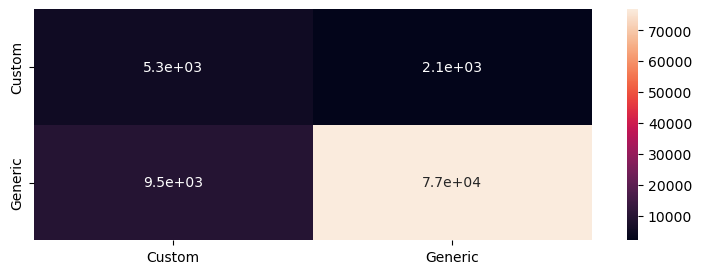

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (9,3))
sn.heatmap(df_metrics_BerNV, annot=True)

# MultinomialNB

### Training Naive Bayes (NB) classifier on training data.

In [20]:
MultiNB = MultinomialNB()
MultiNB.fit(train_tfmat,y_train) # training 
y_pred_MultiNB=MultiNB.predict(test_tfmat) #testing 

In [21]:
print(classification_report(y_test, y_pred_MultiNB ,  labels=np.unique(y_pred_MultiNB)))

              precision    recall  f1-score   support

      Custom       0.55      0.55      0.55      7368
     Generic       0.96      0.96      0.96     86298

    accuracy                           0.93     93666
   macro avg       0.76      0.76      0.76     93666
weighted avg       0.93      0.93      0.93     93666



In [22]:
df_metrics_MultiNB = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_MultiNB),\
                          index=['Custom','Generic'], columns=['Custom','Generic'])
df_metrics_MultiNB

,Custom,Generic
Custom,4050,3318
Generic,3289,83009


<AxesSubplot:>

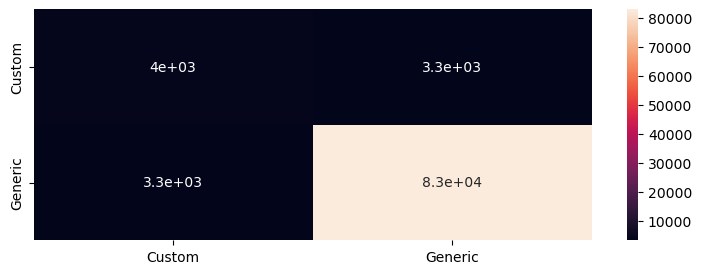

In [23]:
plt.figure(figsize = (9,3))
sn.heatmap(df_metrics_MultiNB, annot=True)

# LinearSVC

In [24]:
from sklearn.svm import LinearSVC
lsvm=LinearSVC()
lsvm.fit(train_tfmat,y_train) #training
y_pred_lsvm=lsvm.predict(test_tfmat) #testing 

In [25]:
print(classification_report(y_test, y_pred_lsvm ,  labels=np.unique(y_pred_lsvm)))

              precision    recall  f1-score   support

      Custom       0.86      0.65      0.74      7368
     Generic       0.97      0.99      0.98     86298

    accuracy                           0.96     93666
   macro avg       0.92      0.82      0.86     93666
weighted avg       0.96      0.96      0.96     93666



In [26]:
df_metrics_lsvm = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_lsvm),\
                          index=['Custom','Generic'], columns=['Custom','Generic'])
df_metrics_lsvm

,Custom,Generic
Custom,4817,2551
Generic,767,85531


<AxesSubplot:>

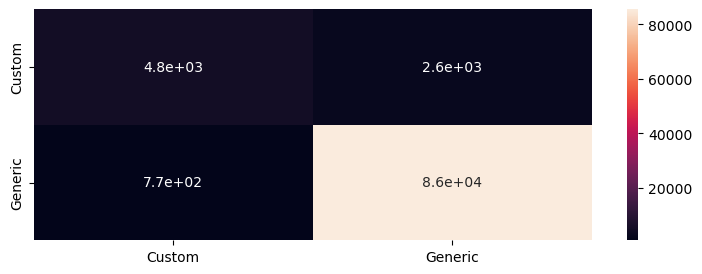

In [27]:
plt.figure(figsize = (9,3))
sn.heatmap(df_metrics_lsvm, annot=True)

# LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=3000)
lr.fit(train_tfmat,y_train) #training
y_pred_lr=lr.predict(test_tfmat) #testing 

In [29]:
print(classification_report(y_test, y_pred_lr ,  labels=np.unique(y_pred_lr)))

              precision    recall  f1-score   support

      Custom       0.83      0.57      0.68      7368
     Generic       0.96      0.99      0.98     86298

    accuracy                           0.96     93666
   macro avg       0.90      0.78      0.83     93666
weighted avg       0.95      0.96      0.95     93666



In [30]:
from sklearn import tree
#DT = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
DT = tree.DecisionTreeClassifier()
DT.fit(train_tfmat,y_train) #training
y_pred_DT=DT.predict(test_tfmat) #testing 

In [31]:
print(classification_report(y_test, y_pred_DT ,  labels=np.unique(y_pred_DT)))

              precision    recall  f1-score   support

      Custom       0.90      0.74      0.81      7368
     Generic       0.98      0.99      0.99     86298

    accuracy                           0.97     93666
   macro avg       0.94      0.87      0.90     93666
weighted avg       0.97      0.97      0.97     93666



In [32]:
df_metrics_DT = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_DT),\
                          index=['Custom','Generic'], columns=['Custom','Generic'])
df_metrics_DT

,Custom,Generic
Custom,5441,1927
Generic,588,85710


<AxesSubplot:>

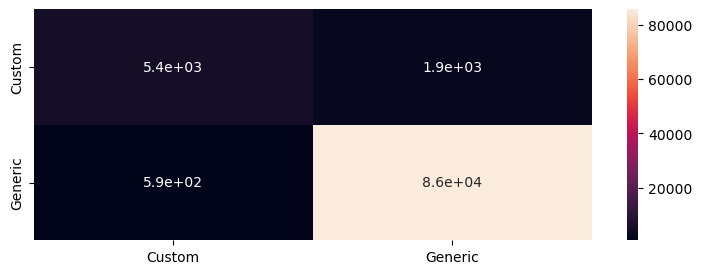

In [33]:
plt.figure(figsize = (9,3))
sn.heatmap(df_metrics_DT, annot=True)

In [34]:
from sklearn.metrics import  accuracy_score
from sklearn import metrics

print("accuracy of BernoulliNB:", metrics.accuracy_score(y_test, y_pred_BerNV))
print("accuracy of MultinomialNB:", metrics.accuracy_score(y_test, y_pred_MultiNB))
print("accuracy of SVM:", metrics.accuracy_score(y_test, y_pred_lsvm))
print("accuracy of LR:", metrics.accuracy_score(y_test, y_pred_lr))
print("accuracy of DT:", metrics.accuracy_score(y_test, y_pred_DT))

accuracy of BernoulliNB: 0.8764866653855188
accuracy of MultinomialNB: 0.9294621314030704
accuracy of SVM: 0.964576260329255
accuracy of LR: 0.9571562786923751
accuracy of DT: 0.9731492750838084


# test 

In [35]:
phrase= ["مرحباً، شكراً لك على التقييم يعمل فريقنا دوماً على إضافة كل جديد، لذا تابعنا لتبقى على إطلاع."]
test_str = vectorizer.transform(phrase)
test_tfstr = tfidf.transform(test_str)
test_tfstr.shape

lsvm.predict(test_tfstr.toarray())

array(['Generic'], dtype=object)

# save model

In [36]:
import pickle
with open('lsvm_model.pickle', 'wb') as f:
    pickle.dump(lsvm, f)

with open('lr_model.pickle', 'wb') as f:
    pickle.dump(lr, f)
    
with open('dt_model.pickle', 'wb') as f:
    pickle.dump(DT, f)
    
    
pickle.dump(vectorizer, open("vectorizer.pickle", "wb")) #//Save vectorizer